In [62]:
# =========================================
# Step 1: Import Required Libraries
# =========================================

# pandas → data manipulation & reading Excel
import pandas as pd  

# numpy → numerical operations
import numpy as np  

# matplotlib & seaborn → data visualization
import matplotlib.pyplot as plt  
import seaborn as sns  


# =========================================
# Step 2: Define File Paths
# =========================================

# Path to Forest bird monitoring dataset
forest_file = "Bird_Monitoring_Data_FOREST.xlsx"  

# Path to Grassland bird monitoring dataset
grassland_file = "Bird_Monitoring_Data_GRASSLAND.xlsx"  

# =========================================
# Step 3: Get Sheet Names for Each File
# =========================================

# Fetch list of sheet names for Forest dataset
forest_sheets = pd.ExcelFile(forest_file).sheet_names  

# Fetch list of sheet names for Grassland dataset
grassland_sheets = pd.ExcelFile(grassland_file).sheet_names  

print("Forest Sheets:", forest_sheets)
print("Grassland Sheets:", grassland_sheets)


Forest Sheets: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']
Grassland Sheets: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']


In [63]:
# =========================================
# Step 4: Read & Inspect One Sheet from Forest Data
# =========================================

# Select first sheet from Forest file
sheet_name = forest_sheets[0]  # 'ANTI'

# Read the sheet into a DataFrame
df_forest_sample = pd.read_excel(forest_file, sheet_name=sheet_name)

# Show sheet name being read
print(f"\nReading Forest sheet: {sheet_name}")

# Display shape (rows, columns)
print("Shape:", df_forest_sample.shape)

# Display first 5 rows
print("\nSample Data:")
print(df_forest_sample.head())

# Display column names
print("\nColumns:")
print(df_forest_sample.columns.tolist())

# Check basic data info (types, non-null counts)
print("\nInfo:")
print(df_forest_sample.info())



Reading Forest sheet: ANTI
Shape: (333, 29)

Sample Data:
  Admin_Unit_Code  Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI            NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI            NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI            NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI            NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI            NaN    ANTI 1  ANTI-0036        Forest  2018   

        Date Start_Time  End_Time          Observer  ...  NPSTaxonCode  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         83803   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         90935   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         84865   
3 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         93634   
4 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         88394   

  AOU_Code PIF_Watchlist_Status R

In [64]:
# =========================================
# Step 5: Read all sheets for Forest & Grassland into dictionaries
# =========================================

# Read Forest data
forest_data = {}  # Dictionary: {sheet_name: DataFrame}
for sheet in forest_sheets:
    df = pd.read_excel(forest_file, sheet_name=sheet)
    forest_data[sheet] = df
    print(f"Loaded Forest sheet: {sheet} | Shape: {df.shape}")

# Read Grassland data
grassland_data = {}
for sheet in grassland_sheets:
    df = pd.read_excel(grassland_file, sheet_name=sheet)
    grassland_data[sheet] = df
    print(f"Loaded Grassland sheet: {sheet} | Shape: {df.shape}")

# Quick sanity check
print("\nForest keys loaded:", list(forest_data.keys()))
print("Grassland keys loaded:", list(grassland_data.keys()))


Loaded Forest sheet: ANTI | Shape: (333, 29)
Loaded Forest sheet: CATO | Shape: (805, 29)
Loaded Forest sheet: CHOH | Shape: (2202, 29)
Loaded Forest sheet: GWMP | Shape: (386, 29)
Loaded Forest sheet: HAFE | Shape: (422, 29)
Loaded Forest sheet: MANA | Shape: (465, 29)
Loaded Forest sheet: MONO | Shape: (370, 29)
Loaded Forest sheet: NACE | Shape: (684, 29)
Loaded Forest sheet: PRWI | Shape: (2463, 29)
Loaded Forest sheet: ROCR | Shape: (289, 29)
Loaded Forest sheet: WOTR | Shape: (127, 29)
Loaded Grassland sheet: ANTI | Shape: (3588, 29)
Loaded Grassland sheet: CATO | Shape: (0, 29)
Loaded Grassland sheet: CHOH | Shape: (0, 29)
Loaded Grassland sheet: GWMP | Shape: (0, 29)
Loaded Grassland sheet: HAFE | Shape: (117, 29)
Loaded Grassland sheet: MANA | Shape: (1811, 29)
Loaded Grassland sheet: MONO | Shape: (3015, 29)
Loaded Grassland sheet: NACE | Shape: (0, 29)
Loaded Grassland sheet: PRWI | Shape: (0, 29)
Loaded Grassland sheet: ROCR | Shape: (0, 29)
Loaded Grassland sheet: WOTR | S

In [65]:
import pandas as pd

# -------------------------------------------------------
# Step 1: Combine all forest DataFrames into one dataset
# -------------------------------------------------------

forest_combined = []  # Empty list to collect processed forest DataFrames

for site_name, df in forest_data.items():
    temp_df = df.copy()  # Make a copy so we don't modify original data
    temp_df["Habitat"] = "Forest"  # Add a column to mark habitat type
    temp_df["Site"] = site_name    # Add a column for site name (from sheet)
    forest_combined.append(temp_df)  # Store in the list

# Merge all forest site DataFrames into a single DataFrame
forest_df = pd.concat(forest_combined, ignore_index=True)

print(f"Forest dataset combined: {forest_df.shape}")

# ---------------------------------------------------------
# Step 2: Combine all grassland DataFrames into one dataset
# ---------------------------------------------------------

grassland_combined = []

for site_name, df in grassland_data.items():
    temp_df = df.copy()
    temp_df["Habitat"] = "Grassland"
    temp_df["Site"] = site_name
    grassland_combined.append(temp_df)

grassland_df = pd.concat(grassland_combined, ignore_index=True)

print(f"Grassland dataset combined: {grassland_df.shape}")

# ----------------------------------------------------------
# Step 3: Merge forest and grassland datasets into one file
# ----------------------------------------------------------

master_df = pd.concat([forest_df, grassland_df], ignore_index=True)

print(f"Master dataset shape: {master_df.shape}")
print("Columns:", master_df.columns.tolist())

# ----------------------------------------------------------
# Step 4: Optional - Save merged dataset to CSV for reference
# ----------------------------------------------------------

master_df.to_csv("bird_observations_master.csv", index=False)
print("Master dataset saved as 'bird_observations_master.csv'")


Forest dataset combined: (8546, 31)
Grassland dataset combined: (8531, 31)
Master dataset shape: (17077, 33)
Columns: ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat', 'Site', 'TaxonCode', 'Previously_Obs']


C:\Users\ronak\AppData\Local\Temp\ipykernel_14756\2990760174.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  grassland_df = pd.concat(grassland_combined, ignore_index=True)


Master dataset saved as 'bird_observations_master.csv'


In [67]:
# -----------------------------------
# Step 1: Check for missing values
# -----------------------------------
missing_summary = master_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_summary / len(master_df)) * 100

missing_report = pd.DataFrame({
    "Missing Values": missing_summary,
    "Missing %": missing_percent.round(2)
})

print("\n--- Missing Values Report ---")
print(missing_report)

# -----------------------------------
# Step 2: Check for duplicate rows
# -----------------------------------
duplicate_count = master_df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")

# -----------------------------------
# Step 3: Check data types
# -----------------------------------
print("\n--- Data Types Before Cleaning ---")
print(master_df.dtypes)

# Convert 'Date' to datetime if needed
master_df['Date'] = pd.to_datetime(master_df['Date'], errors='coerce')

# Ensure 'Year' is integer
master_df['Year'] = pd.to_numeric(master_df['Year'], errors='coerce').astype('Int64')

# -----------------------------------
# Step 4: Identify empty columns
# -----------------------------------
empty_cols = [col for col in master_df.columns if master_df[col].isnull().all()]
print(f"\nEmpty columns: {empty_cols}")

# -----------------------------------
# Step 5: Save cleaned version for EDA
# -----------------------------------
master_df.to_csv("bird_observations_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'bird_observations_cleaned.csv'")



--- Missing Values Report ---
                             Missing Values  Missing %
Sub_Unit_Code                         16355      95.77
TaxonCode                              8548      50.06
Previously_Obs                         8546      50.04
NPSTaxonCode                           8531      49.96
Site_Name                              8531      49.96
Sex                                    5183      30.35
Distance                               1486       8.70
AcceptedTSN                              33       0.19
ID_Method                                 2       0.01
Admin_Unit_Code                           0       0.00
Start_Time                                0       0.00
Date                                      0       0.00
Observer                                  0       0.00
End_Time                                  0       0.00
Year                                      0       0.00
Plot_Name                                 0       0.00
Location_Type                     

In [68]:
import pandas as pd

# Step 1 — Load the cleaned dataset
df = pd.read_csv("bird_observations_cleaned.csv")

# Step 2 — Convert 'Date' column to proper datetime format
# Errors='coerce' will turn invalid date formats into NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3 — Ensure 'Year' is integer type
# This will help in grouping and analysis
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# Step 4 — Convert start & end times to datetime.time
# First ensure they are read as strings before conversion
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%H:%M:%S', errors='coerce').dt.time
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Step 5 — Convert numeric columns to float for calculations
numeric_cols = ['Distance', 'Temperature', 'Humidity', 'Initial_Three_Min_Cnt']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 6 — Standardize text columns: strip spaces & title case for consistency
text_cols = ['Common_Name', 'Scientific_Name', 'Observer', 'Site_Name', 'Plot_Name', 'Location_Type', 'Habitat']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Step 7 — Handle categorical columns: convert to category dtype
categorical_cols = ['Flyover_Observed', 'Sex', 'ID_Method', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Step 8 — Save updated dataset
df.to_csv("bird_observations_typed.csv", index=False)

print(" Data types standardized & dataset saved as 'bird_observations_typed.csv'")
print(df.dtypes)


C:\Users\ronak\AppData\Local\Temp\ipykernel_14756\950078129.py:4: DtypeWarning: Columns (1,2,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bird_observations_cleaned.csv")


 Data types standardized & dataset saved as 'bird_observations_typed.csv'
Admin_Unit_Code                        object
Sub_Unit_Code                          object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    Int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                            category
Distance                              float64
Flyover_Observed                     category
Sex                                  category
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                          float64
AOU_Co

In [69]:
import pandas as pd

# Inspect columns first
preview_cols = pd.read_csv("bird_observations_cleaned.csv", nrows=0).columns.tolist()
print(preview_cols)

# Build dtype spec dynamically for only existing columns
dtype_spec = {}
for col in ['Sub_Unit_Code', 'Site', 'Previously_Obs']:  # updated Site_Name -> Site
    if col in preview_cols:
        dtype_spec[col] = 'string'

df = pd.read_csv("bird_observations_cleaned.csv", dtype=dtype_spec)


['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat', 'Site', 'TaxonCode', 'Previously_Obs']


C:\Users\ronak\AppData\Local\Temp\ipykernel_14756\2315050357.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bird_observations_cleaned.csv", dtype=dtype_spec)


In [70]:
df_raw = pd.read_csv("bird_observations_cleaned.csv")
print(df_raw.shape)
print(df_raw.columns)
print(df_raw.head(10))
print(df_raw.info())
print(df_raw[["Year", "Distance", "Temperature", "Humidity"]].describe())



(17077, 33)
Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'Habitat', 'Site', 'TaxonCode',
       'Previously_Obs'],
      dtype='object')
  Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036

C:\Users\ronak\AppData\Local\Temp\ipykernel_14756\3851978990.py:1: DtypeWarning: Columns (1,2,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("bird_observations_cleaned.csv")


In [71]:
import pandas as pd

df = pd.read_csv("bird_observations_cleaned.csv")

print("Raw data shape:", df.shape)
print(df[["Year", "Distance", "Temperature", "Humidity"]].info())
print(df[["Year", "Distance", "Temperature", "Humidity"]].head())


Raw data shape: (17077, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         17077 non-null  int64  
 1   Distance     15591 non-null  object 
 2   Temperature  17077 non-null  float64
 3   Humidity     17077 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 533.8+ KB
None
   Year         Distance  Temperature   Humidity
0  2018     <= 50 Meters         19.9  79.400002
1  2018     <= 50 Meters         19.9  79.400002
2  2018  50 - 100 Meters         19.9  79.400002
3  2018     <= 50 Meters         19.9  79.400002
4  2018     <= 50 Meters         19.9  79.400002


C:\Users\ronak\AppData\Local\Temp\ipykernel_14756\2754957372.py:3: DtypeWarning: Columns (1,2,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bird_observations_cleaned.csv")


In [72]:
df = pd.read_csv("bird_observations_cleaned.csv")

print(df.shape)  
print(df.columns)

# Now apply filters
df = df[(df["Year"].between(2000, 2025))]
df = df[df["Temperature"].between(-10, 50)]
df = df[df["Humidity"].between(0, 100)]

print(f"Shape after filtering (without Distance): {df.shape}")

(17077, 33)
Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'Habitat', 'Site', 'TaxonCode',
       'Previously_Obs'],
      dtype='object')
Shape after filtering (without Distance): (17077, 33)


C:\Users\ronak\AppData\Local\Temp\ipykernel_14756\181970597.py:1: DtypeWarning: Columns (1,2,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bird_observations_cleaned.csv")


In [73]:
print(df[["Year", "Distance", "Temperature", "Humidity"]].info())
print(df[["Year", "Distance", "Temperature", "Humidity"]].isna().sum())
print(df[["Year", "Distance", "Temperature", "Humidity"]].head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         17077 non-null  int64  
 1   Distance     15591 non-null  object 
 2   Temperature  17077 non-null  float64
 3   Humidity     17077 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 533.8+ KB
None
Year              0
Distance       1486
Temperature       0
Humidity          0
dtype: int64
   Year         Distance  Temperature   Humidity
0  2018     <= 50 Meters         19.9  79.400002
1  2018     <= 50 Meters         19.9  79.400002
2  2018  50 - 100 Meters         19.9  79.400002
3  2018     <= 50 Meters         19.9  79.400002
4  2018     <= 50 Meters         19.9  79.400002
5  2018     <= 50 Meters         19.9  79.400002
6  2018  50 - 100 Meters         19.9  79.400002
7  2018     <= 50 Meters         19.9  79.400002
8  2018     <= 50 Meters         19.9

In [74]:
for col in ["Year", "Temperature", "Humidity"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows where any filter column is NaN
df = df.dropna(subset=["Year", "Temperature", "Humidity"])

df_filtered = df[
    (df["Year"].between(2000, 2025)) &
    (df["Temperature"].between(-10, 50)) &
    (df["Humidity"].between(0, 100))
]

print("Shape after numeric conversion, dropping NaNs and filtering:", df_filtered.shape)


Shape after numeric conversion, dropping NaNs and filtering: (17077, 33)


In [75]:
print("Initial rows:", len(df))

df1 = df[df["Year"].between(2000, 2025)]
print("After Year filter:", len(df1))

df3 = df1[df1["Temperature"].between(-10, 50)]
print("After Temperature filter:", len(df3))

df4 = df3[df3["Humidity"].between(0, 100)]
print("After Humidity filter:", len(df4))


Initial rows: 17077
After Year filter: 17077
After Temperature filter: 17077
After Humidity filter: 17077


In [76]:
df.info()  # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Admin_Unit_Code              17077 non-null  object 
 1   Sub_Unit_Code                722 non-null    object 
 2   Site_Name                    8546 non-null   object 
 3   Plot_Name                    17077 non-null  object 
 4   Location_Type                17077 non-null  object 
 5   Year                         17077 non-null  int64  
 6   Date                         17077 non-null  object 
 7   Start_Time                   17077 non-null  object 
 8   End_Time                     17077 non-null  object 
 9   Observer                     17077 non-null  object 
 10  Visit                        17077 non-null  int64  
 11  Interval_Length              17077 non-null  object 
 12  ID_Method                    17075 non-null  object 
 13  Distance        

In [77]:
df = df.drop_duplicates()
print(f" Shape after removing duplicates: {df.shape}")


 Shape after removing duplicates: (15372, 33)


In [78]:
print(" Missing values per column:")
print(df.isna().sum())

df.to_csv("bird_observations_cleaned.csv", index=False)
print("Saved as 'bird_observations_cleaned.csv'")


 Missing values per column:
Admin_Unit_Code                    0
Sub_Unit_Code                  14650
Site_Name                       6826
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          2
Distance                         689
Flyover_Observed                   0
Sex                             5183
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       28
NPSTaxonCode                    6826
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind      

In [79]:
import pandas as pd

df = pd.read_csv("bird_observations_cleaned.csv")

print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

# Proceed with analysis or visualization on full data


Dataset shape: (15372, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Admin_Unit_Code              15372 non-null  object 
 1   Sub_Unit_Code                722 non-null    object 
 2   Site_Name                    8546 non-null   object 
 3   Plot_Name                    15372 non-null  object 
 4   Location_Type                15372 non-null  object 
 5   Year                         15372 non-null  int64  
 6   Date                         15372 non-null  object 
 7   Start_Time                   15372 non-null  object 
 8   End_Time                     15372 non-null  object 
 9   Observer                     15372 non-null  object 
 10  Visit                        15372 non-null  int64  
 11  Interval_Length              15372 non-null  object 
 12  ID_Method                    15370 non-null  ob

In [80]:
def parse_distance(dist):
    if pd.isna(dist) or dist.strip() == '':
        return None
    dist = dist.strip()
    if dist.startswith('<='):
        # example: '<= 50 Meters' -> 50
        return float(dist.split()[1])
    elif '-' in dist:
        # example: '50 - 100 Meters'
        parts = dist.split('-')
        low = float(parts[0].strip())
        high = float(parts[1].split()[0].strip())
        return (low + high) / 2
    else:
        return None

df['Distance_numeric'] = df['Distance'].apply(parse_distance)
print(df[['Distance', 'Distance_numeric']].head(10))

df.to_csv("bird_observations_cleaned.csv")
print("Saved as 'bird_observations_cleaned.csv'")


          Distance  Distance_numeric
0     <= 50 Meters              50.0
1     <= 50 Meters              50.0
2  50 - 100 Meters              75.0
3     <= 50 Meters              50.0
4     <= 50 Meters              50.0
5     <= 50 Meters              50.0
6  50 - 100 Meters              75.0
7     <= 50 Meters              50.0
8     <= 50 Meters              50.0
9     <= 50 Meters              50.0
Saved as 'bird_observations_cleaned.csv'


In [1]:
# Step 0: imports and helper functions
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# create folder to save figures
os.makedirs("figures", exist_ok=True)

# small helper to save & show plots reliably
def save_show(fig, filename, dpi=150):
    path = os.path.join("figures", filename)
    fig.savefig(path, bbox_inches="tight", dpi=dpi)
    plt.show()
    plt.close(fig)


In [2]:
# 1. Load data
df = pd.read_csv("bird_observations_cleaned.csv")  # update path if needed

# 1.a quick shape & columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# 1.b basic head and dtypes
display(df.head(6))
print(df.dtypes)


Shape: (15372, 35)
Columns: ['Unnamed: 0', 'Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat', 'Site', 'TaxonCode', 'Previously_Obs', 'Distance_numeric']


,Unnamed: 0,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,...,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Habitat,Site,TaxonCode,Previously_Obs,Distance_numeric
0,0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,ANTI,NaN,NaN,50.0
1,1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,Forest,ANTI,NaN,NaN,50.0
2,2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,ANTI,NaN,NaN,75.0
3,3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,ANTI,NaN,NaN,50.0
4,4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,ANTI,NaN,NaN,50.0
5,5,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,...,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,Forest,ANTI,NaN,NaN,50.0


Unnamed: 0                       int64
Admin_Unit_Code                 object
Sub_Unit_Code                   object
Site_Name                       object
Plot_Name                       object
Location_Type                   object
Year                             int64
Date                            object
Start_Time                      object
End_Time                        object
Observer                        object
Visit                            int64
Interval_Length                 object
ID_Method                       object
Distance                        object
Flyover_Observed                  bool
Sex                             object
Common_Name                     object
Scientific_Name                 object
AcceptedTSN                    float64
NPSTaxonCode                   float64
AOU_Code                        object
PIF_Watchlist_Status              bool
Regional_Stewardship_Status       bool
Temperature                    float64
Humidity                 

In [3]:
# convert Date to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # safe parse, NaT for invalid
# derive Year, Month, Day for easier grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)  # e.g. "2018-05"

# check if conversion worked
print("Date nulls:", df['Date'].isna().sum())
print("Years range:", df['Year'].min(), "-", df['Year'].max())


Date nulls: 0
Years range: 2018 - 2018


In [4]:
# 3. Parse distance ranges to numeric midpoint if not already present
def parse_distance_to_midpoint(val):
    if pd.isna(val):
        return np.nan
    v = str(val).strip()
    # handle formats like '<= 50 Meters', '50 - 100 Meters', '100 Meters' etc.
    if v.startswith('<='):
        # take the number after <=
        try:
            num = float(v.split()[1])
            return num / 1.0  # midpoint treat as boundary value
        except: return np.nan
    if '-' in v:
        try:
            low, hi = v.split('-', 1)
            low = float(low.strip())
            hi = float(hi.split()[0].strip())
            return (low + hi) / 2.0
        except: return np.nan
    # catch single number
    try:
        # remove text like 'Meters'
        token = v.split()[0]
        return float(token)
    except:
        return np.nan

# create or overwrite Distance_numeric
if 'Distance_numeric' not in df.columns or df['Distance_numeric'].isnull().all():
    df['Distance_numeric'] = df['Distance'].apply(parse_distance_to_midpoint)

print("Distance_numeric dtype:", df['Distance_numeric'].dtype)
print("Distance_numeric nulls:", df['Distance_numeric'].isna().sum())
display(df[['Distance', 'Distance_numeric']].head(10))


Distance_numeric dtype: float64
Distance_numeric nulls: 689


,Distance,Distance_numeric
0,<= 50 Meters,50.0
1,<= 50 Meters,50.0
2,50 - 100 Meters,75.0
3,<= 50 Meters,50.0
4,<= 50 Meters,50.0
5,<= 50 Meters,50.0
6,50 - 100 Meters,75.0
7,<= 50 Meters,50.0
8,<= 50 Meters,50.0
9,<= 50 Meters,50.0


Sub_Unit_Code       14650
TaxonCode            8548
Previously_Obs       8546
NPSTaxonCode         6826
Site_Name            6826
Sex                  5183
Distance              689
Distance_numeric      689
AcceptedTSN            28
ID_Method               2
Location_Type           0
Plot_Name               0
Unnamed: 0              0
Admin_Unit_Code         0
Interval_Length         0
Visit                   0
Observer                0
End_Time                0
Common_Name             0
Year                    0
dtype: int64

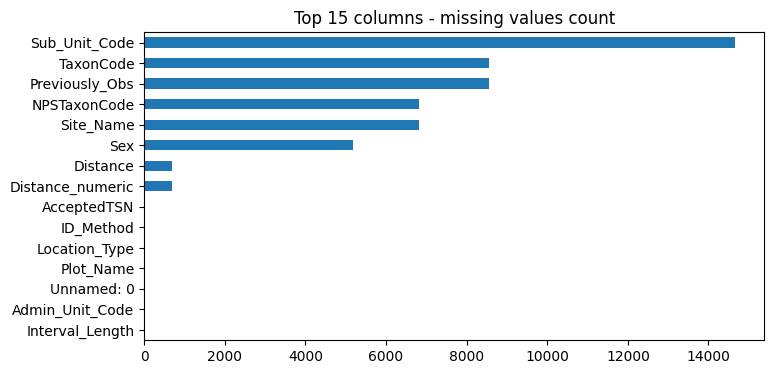

In [5]:
# 4. Missingness overview (top)
missing = df.isna().sum().sort_values(ascending=False)
display(missing.head(20))

# plot missingness bar for the top 10 columns with most NAs
top_missing = missing.head(15)
fig, ax = plt.subplots(figsize=(8,4))
top_missing.plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_title("Top 15 columns - missing values count")
save_show(fig, "missing_top15.png")


                    count       mean        std   min        25%        50%  \
Distance_numeric  14683.0  63.236396  12.478715  50.0  50.000000  75.000000   
Temperature       15372.0  22.493826   4.193138  11.0  19.700001  22.200001   
Humidity          15372.0  74.159335  12.168509   7.3  68.000000  76.599998   

                        75%        max  
Distance_numeric  75.000000  75.000000  
Temperature       25.000000  37.299999  
Humidity          83.400002  98.800003  


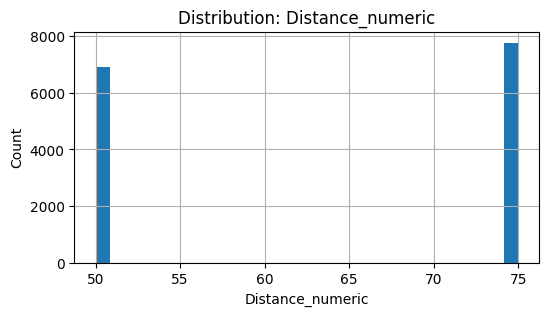

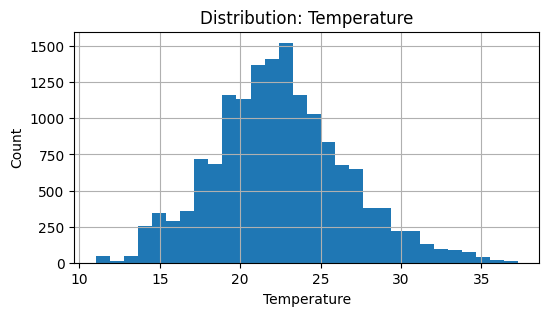

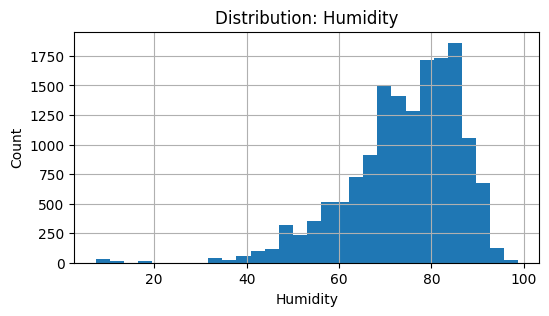

In [6]:
# 5. Describe numeric columns
num_cols = ['Distance_numeric', 'Temperature', 'Humidity']
print(df[num_cols].describe().T)

# histograms for numeric columns
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,3))
    df[col].dropna().hist(bins=30, ax=ax)
    ax.set_title(f"Distribution: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    save_show(fig, f"hist_{col}.png")


Common_Name
Northern Cardinal          1125
Carolina Wren               993
Red-eyed Vireo              738
Eastern Tufted Titmouse     720
Indigo Bunting              611
Eastern Wood-Pewee          574
Field Sparrow               492
Red-bellied Woodpecker      489
American Robin              470
Acadian Flycatcher          462
Name: count, dtype: int64


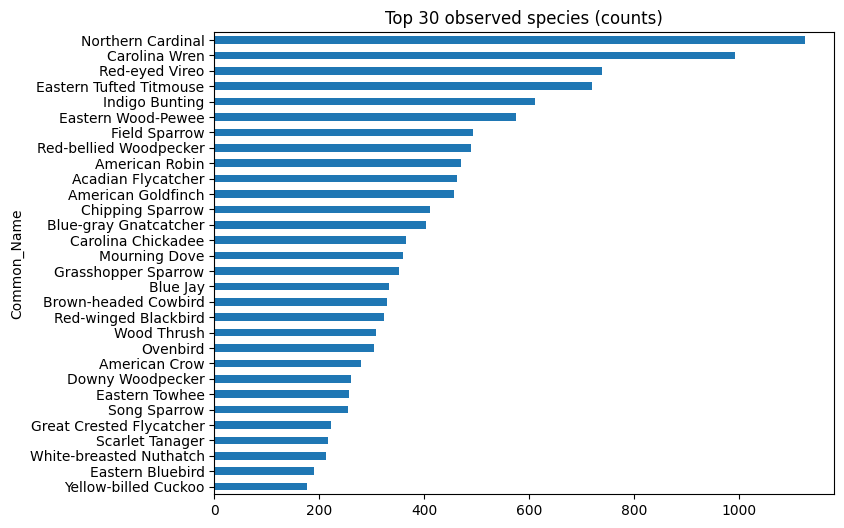

In [7]:
# 6. Top species by observation count
species_col = 'Common_Name'  # or 'Scientific_Name' if preferred
top_species = df[species_col].value_counts().head(30)
print(top_species.head(10))

fig, ax = plt.subplots(figsize=(8,6))
top_species.sort_values().plot(kind='barh', ax=ax)
ax.set_title("Top 30 observed species (counts)")
save_show(fig, "top_species.png")


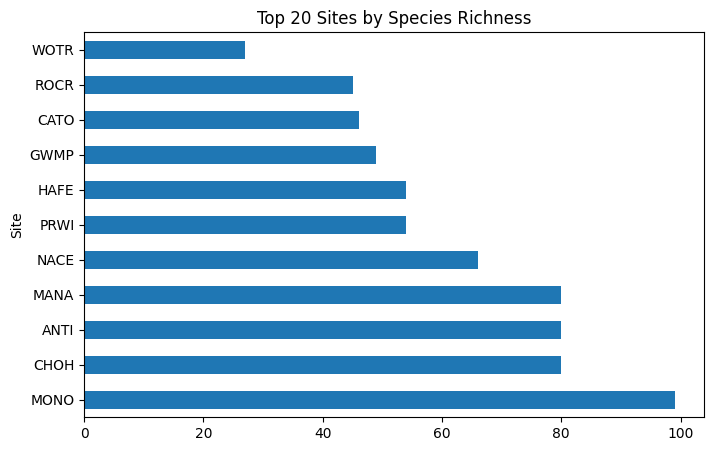

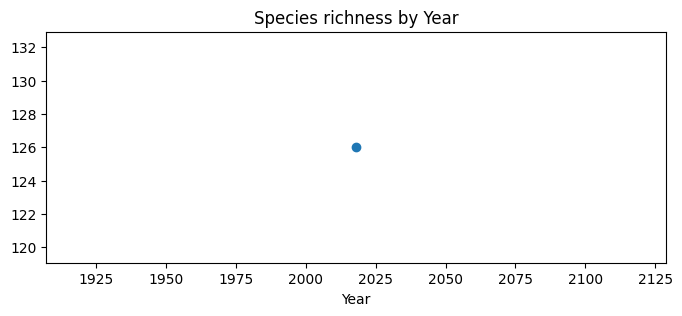

In [8]:
# 7.a richness per Site
richness_site = df.groupby('Site')[species_col].nunique().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(8,5))
richness_site.plot(kind='barh', ax=ax)
ax.set_title("Top 20 Sites by Species Richness")
save_show(fig, "richness_by_site.png")

# 7.b richness per Year (temporal)
richness_year = df.groupby('Year')[species_col].nunique().sort_index()
fig, ax = plt.subplots(figsize=(8,3))
richness_year.plot(ax=ax, marker='o')
ax.set_title("Species richness by Year")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
save_show(fig, "richness_by_year.png")


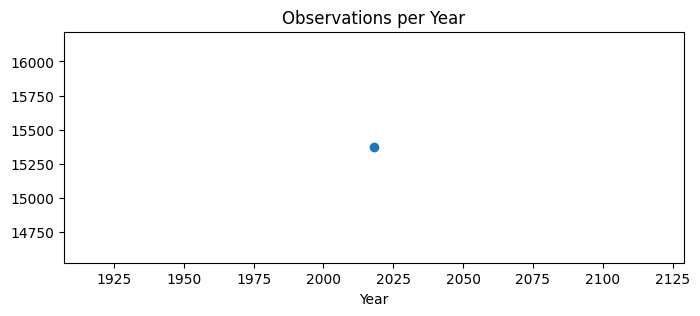

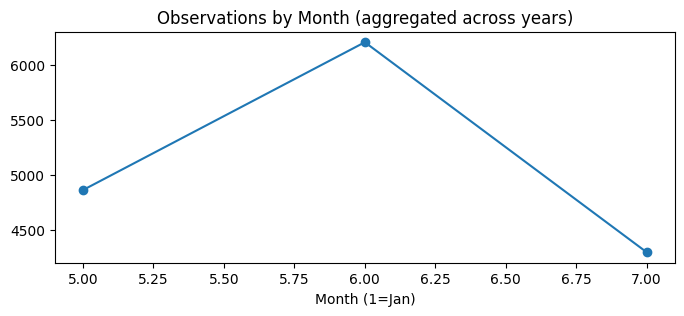

In [9]:
# 8. Observations per Year and per Month (seasonality)
counts_year = df.groupby('Year').size()
counts_month = df.groupby('Month').size()  # aggregated across years

fig, ax = plt.subplots(figsize=(8,3))
counts_year.plot(ax=ax, marker='o')
ax.set_title("Observations per Year")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
save_show(fig, "obs_per_year.png")

fig, ax = plt.subplots(figsize=(8,3))
counts_month.plot(ax=ax, marker='o')
ax.set_title("Observations by Month (aggregated across years)")
ax.set_xlabel("Month (1=Jan)")
save_show(fig, "obs_by_month.png")


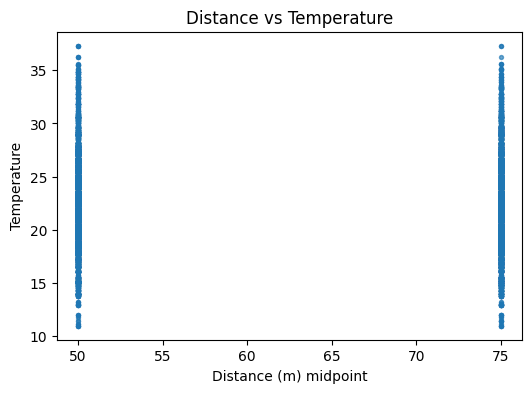

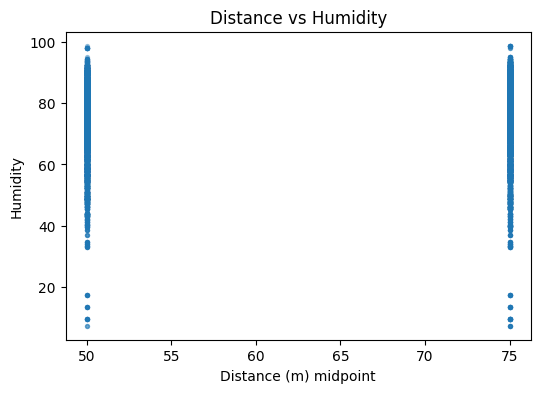

In [10]:
# 9. Scatter plots (Distance_numeric vs Temperature/Humidity)
for col in ['Temperature', 'Humidity']:
    fig, ax = plt.subplots(figsize=(6,4))
    # dropna in both columns
    sub = df[['Distance_numeric', col]].dropna()
    ax.scatter(sub['Distance_numeric'], sub[col], s=8, alpha=0.4)
    ax.set_xlabel('Distance (m) midpoint')
    ax.set_ylabel(col)
    ax.set_title(f'Distance vs {col}')
    save_show(fig, f"distance_vs_{col.lower()}.png")


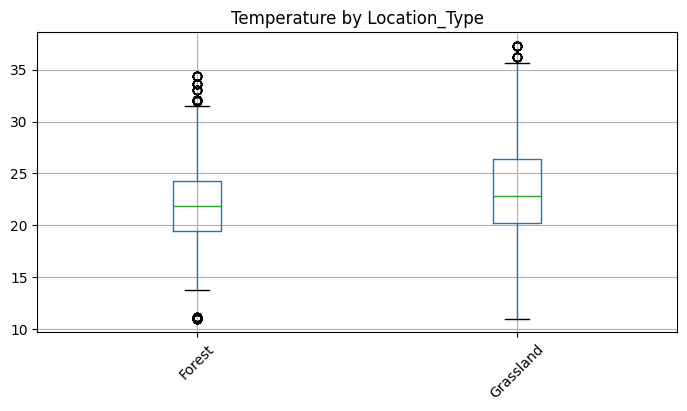

In [11]:
# 10. Boxplot Temperature by Location_Type (if enough categories)
if 'Location_Type' in df.columns:
    # choose categories with reasonable counts
    cat_counts = df['Location_Type'].value_counts()
    cats = cat_counts[cat_counts > 30].index.tolist()  # categories with >30 obs
    fig, ax = plt.subplots(figsize=(8,4))
    df[df['Location_Type'].isin(cats)].boxplot(column='Temperature', by='Location_Type', ax=ax, rot=45)
    ax.set_title("Temperature by Location_Type")
    ax.set_xlabel("")
    plt.suptitle("")  # remove automatic subtitle
    save_show(fig, "temp_by_locationtype.png")


In [12]:
# 11. Missing Distance handling options
print("Distance missing before:", df['Distance_numeric'].isna().sum(), " / ", len(df))

# Option A: leave as NaN (use categorical approach)
df['Distance_cat'] = df['Distance'].fillna('Unknown')

# Option B: impute midpoint with median distance
median_dist = df['Distance_numeric'].median()
df['Distance_imputed_median'] = df['Distance_numeric'].fillna(median_dist)

print("Median distance used for imputation:", median_dist)

# Save short summary to CSV for review
df[['Distance', 'Distance_numeric', 'Distance_imputed_median']].sample(10).to_csv("distance_check_sample.csv", index=False)


Distance missing before: 689  /  15372
Median distance used for imputation: 75.0


In [13]:
# 12. Save a cleaned copy with Distance_numeric
df.to_csv("bird_observations_final_for_eda.csv", index=False)
print("Saved bird_observations_final_for_eda.csv")

# Save summary tables:
top_species.to_csv("top_species_30.csv")
richness_site.to_csv("richness_site_top20.csv")
counts_year.to_csv("obs_per_year.csv")


Saved bird_observations_final_for_eda.csv


(15372, 35)
   Unnamed: 0 Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name  \
0           0            ANTI           NaN    ANTI 1  ANTI-0036   
1           1            ANTI           NaN    ANTI 1  ANTI-0036   
2           2            ANTI           NaN    ANTI 1  ANTI-0036   
3           3            ANTI           NaN    ANTI 1  ANTI-0036   
4           4            ANTI           NaN    ANTI 1  ANTI-0036   

  Location_Type  Year        Date Start_Time  End_Time  ...   Humidity  \
0        Forest  2018  2018-05-22   06:19:00  06:29:00  ...  79.400002   
1        Forest  2018  2018-05-22   06:19:00  06:29:00  ...  79.400002   
2        Forest  2018  2018-05-22   06:19:00  06:29:00  ...  79.400002   
3        Forest  2018  2018-05-22   06:19:00  06:29:00  ...  79.400002   
4        Forest  2018  2018-05-22   06:19:00  06:29:00  ...  79.400002   

               Sky                                   Wind         Disturbance  \
0  Cloudy/Overcast  Calm (< 1 mph) smoke rises vertic

C:\Users\ronak\AppData\Local\Temp\ipykernel_9288\2576953540.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.values, y=species_counts.index, palette="viridis")


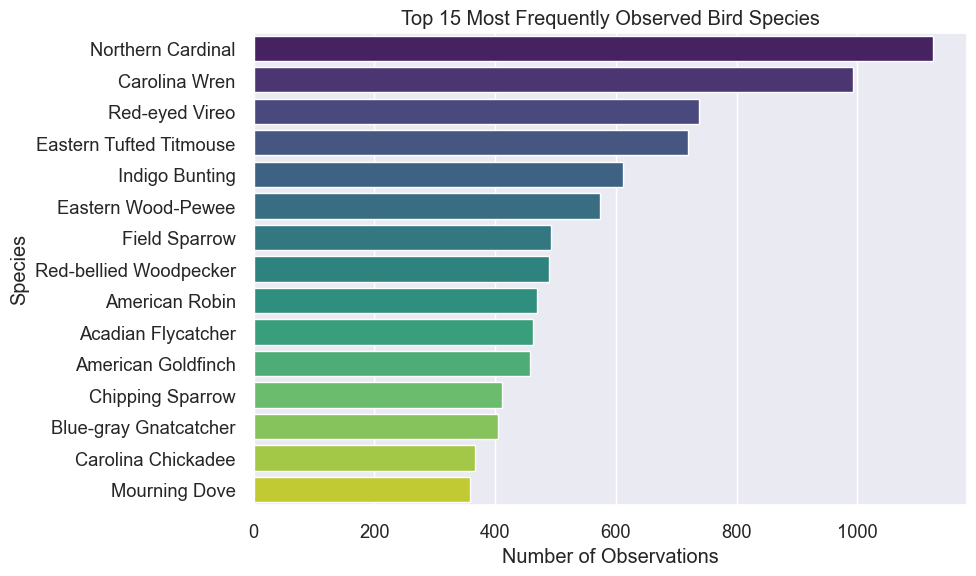

C:\Users\ronak\AppData\Local\Temp\ipykernel_9288\2576953540.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Distance", order=df["Distance"].value_counts().index, palette="coolwarm")


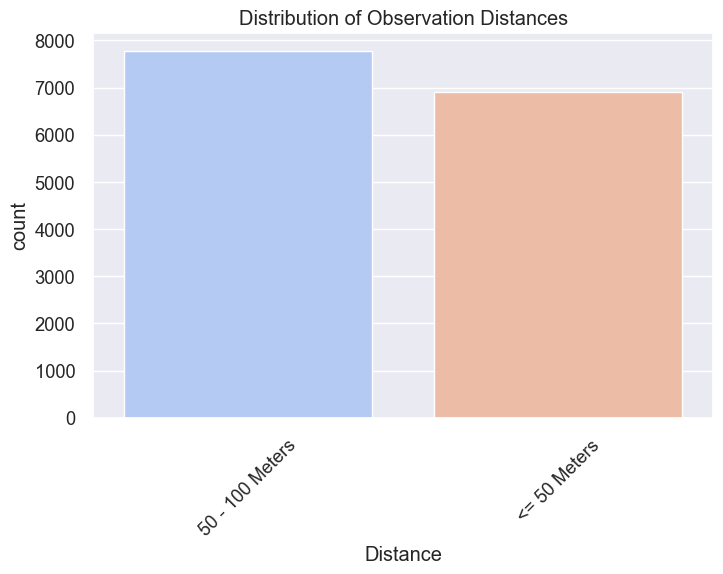

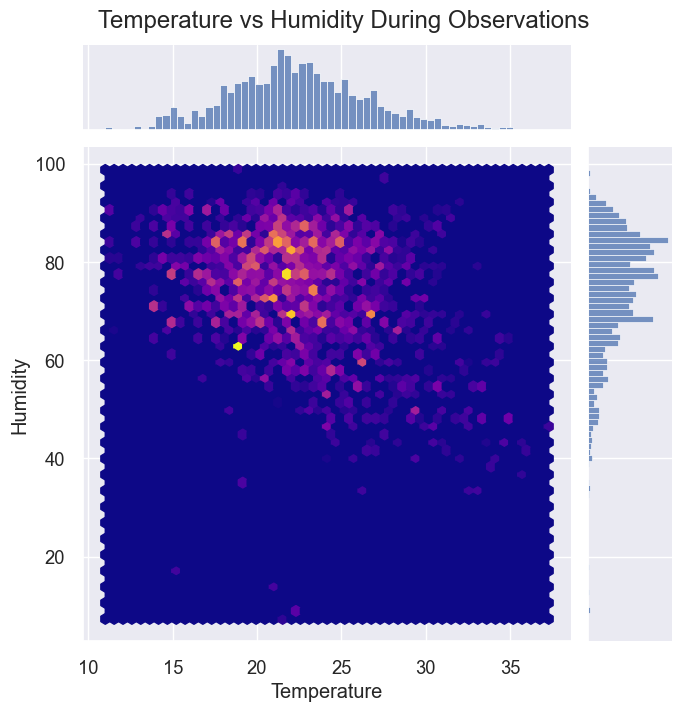

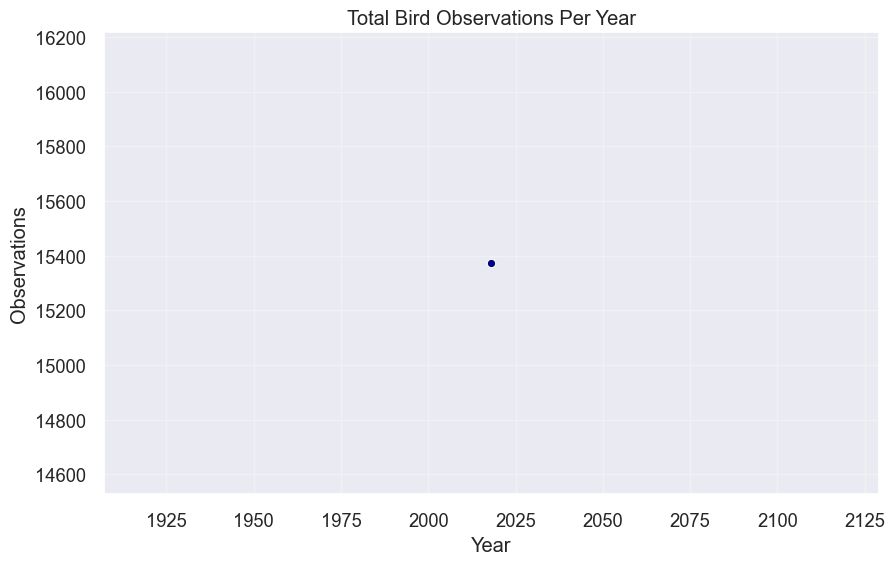

C:\Users\ronak\AppData\Local\Temp\ipykernel_9288\2576953540.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["Common_Name"].isin(top_species)], x="Common_Name", y="Temperature", palette="Set2")


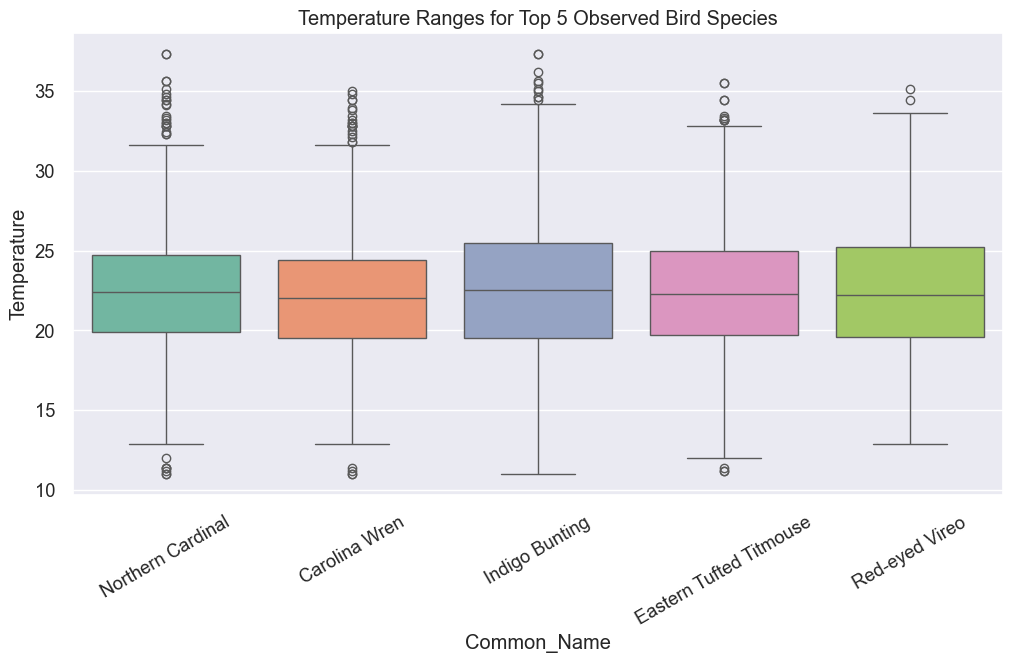

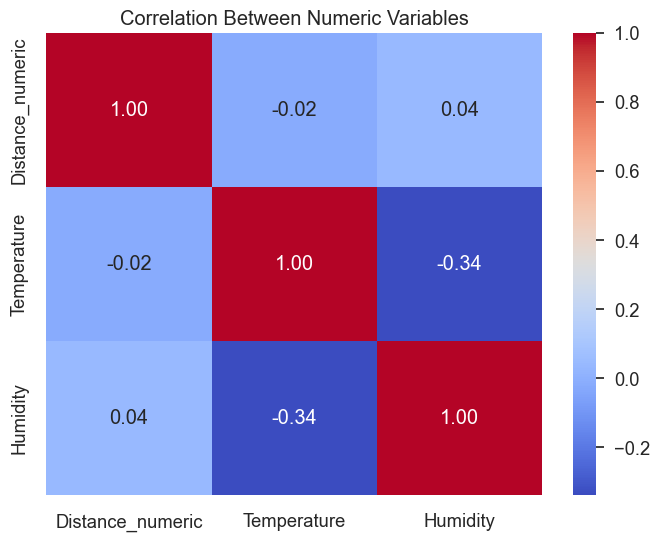

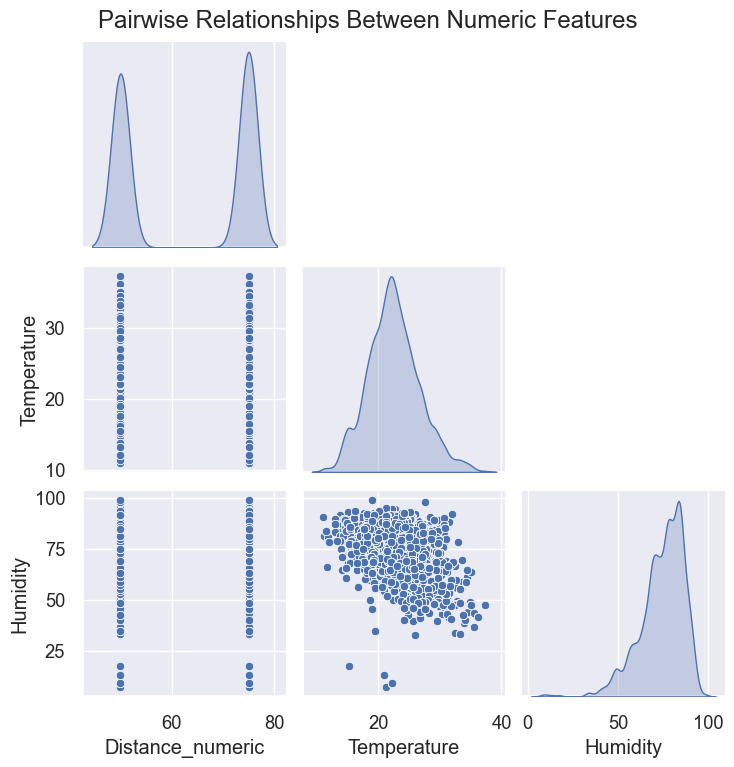

In [15]:
# ============================================================
# STEP 0: Import libraries
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create a folder for saved charts
os.makedirs("eda_charts", exist_ok=True)

# Make plots look better
plt.style.use('seaborn-v0_8')
sns.set_theme(font_scale=1.2)

# ============================================================
# STEP 1: Load cleaned dataset
# ============================================================
df = pd.read_csv("bird_observations_cleaned.csv")

# Quick look at data
print(df.shape)
print(df.head())

# ============================================================
# STEP 2: Missing values summary
# ============================================================
missing_values = df.isna().sum().sort_values(ascending=False)
print("\nMissing Values:\n", missing_values)
missing_values.to_csv("eda_charts/missing_values_summary.csv", index=True)

# ============================================================
# STEP 3: Species frequency analysis
# ============================================================
species_counts = df["Common_Name"].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.values, y=species_counts.index, palette="viridis")
plt.title("Top 15 Most Frequently Observed Bird Species")
plt.xlabel("Number of Observations")
plt.ylabel("Species")
plt.tight_layout()
plt.savefig("eda_charts/top_species.png", dpi=300)  # Save chart
plt.show()

# ============================================================
# STEP 4: Distance category distribution
# ============================================================
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Distance", order=df["Distance"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Observation Distances")
plt.xticks(rotation=45)
plt.savefig("eda_charts/distance_distribution.png", dpi=300)
plt.show()

# ============================================================
# STEP 5: Temperature vs Humidity (joint plot)
# ============================================================
sns.jointplot(data=df, x="Temperature", y="Humidity", kind="hex", cmap="plasma", height=7)
plt.suptitle("Temperature vs Humidity During Observations", y=1.02)
plt.savefig("eda_charts/temp_vs_humidity.png", dpi=300)
plt.show()

# ============================================================
# STEP 6: Yearly trends in observations
# ============================================================
yearly_counts = df.groupby("Year")["Common_Name"].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", color="navy")
plt.title("Total Bird Observations Per Year")
plt.ylabel("Observations")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.savefig("eda_charts/yearly_trends.png", dpi=300)
plt.show()

# ============================================================
# STEP 7: Temperature range preferences by species
# ============================================================
top_species = df["Common_Name"].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["Common_Name"].isin(top_species)], x="Common_Name", y="Temperature", palette="Set2")
plt.title("Temperature Ranges for Top 5 Observed Bird Species")
plt.xticks(rotation=30)
plt.savefig("eda_charts/temp_range_by_species.png", dpi=300)
plt.show()

# ============================================================
# STEP 8: Correlation heatmap for numeric variables
# ============================================================
numeric_cols = ["Distance_numeric", "Temperature", "Humidity"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Variables")
plt.savefig("eda_charts/correlation_heatmap.png", dpi=300)
plt.show()

# ============================================================
# STEP 9: Pair plot for multivariate relationships
# ============================================================
pairplot = sns.pairplot(df[numeric_cols].dropna(), diag_kind="kde", corner=True)
pairplot.fig.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
pairplot.savefig("eda_charts/pairplot.png", dpi=300)
plt.show()
